In [1]:
import numpy as np 
import scipy

In [2]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [35]:
# Example sizes
Nr = 6 # Number of rows in A and Ur
Nx = 9    # Size of identity matrix
Nv = 7    # Another dimension in A (different from Nx)

# Example matrices A and Ur
A = np.random.rand(Nr, Nx * Nx * Nv)  # Matrix A with size Nr x (Nx * Nx * Nv)
Ur = np.random.rand(Nx * Nv, Nr)      # Matrix Ur with size (Nx * Nv) x Nr
I = scipy.sparse.identity(Nx, dtype=int)

# Result matrix (to hold A x (Ur ⊗ I)), which should be of size Nr x (Nr * Nx)
result = np.zeros((Nr, Nr * Nx))  # This is the final result shape

In [36]:
for ii in range(Nx):
    A_block = A[:, Nv*Nx*ii: Nv*Nx*(ii+1)]
    U_block = scipy.sparse.kron(Ur[ii*Nv: (ii+1)*Nv, :], I)
    result += A_block @ U_block

In [37]:
result2 = A @ scipy.sparse.kron(Ur, I)

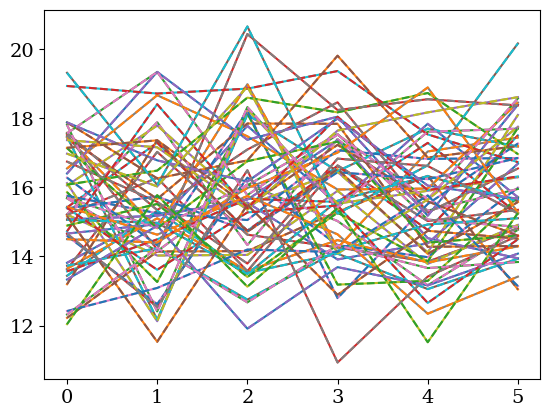

In [39]:
_ = plt.plot(result[:, :])
_ = plt.plot(result2[:, :], ls="--")